# ROB311 TP1
**Use KNN algorithm to detect breast cancer and haberman's survival possibility**

*Authors: Simon QUEYRUT, Zhi ZHOU*

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import operator
import sklearn
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Assign colum names to the dataset
colum_names = ['radius', 'texture', 'perimeter', 'area', 'smoothness',
         'compactness', 'concavity', 'concave points', 'symmetry', 'Class']

data_path = "./breast-cancer-wisconsin.data"

# Read dataset to pandas dataframe
dataset = pd.read_csv(data_path, names=colum_names)

# display example data
dataset.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,Class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [11]:
# split features and labels apart
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# split up training data and test data, 80% of the data used for train and 20% used for test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

print('training data size: ', X_train.shape)
X_train
print('test data size: ', X_test.shape)
X_test

training data size:  (559, 9)
test data size:  (140, 9)


array([[7, 8, 3, ..., 7, 8, 2],
       [1, 1, 1, ..., 1, 1, 1],
       [5, 4, 3, ..., 2, 3, 1],
       ...,
       [5, 1, 1, ..., 1, 1, 1],
       [5, 2, 2, ..., 1, 3, 1],
       [4, 1, 1, ..., 1, 1, 1]], dtype=object)

In [12]:
# function used for calculating euclidean distance
def euclidian_distance(X_test, X_train, length):  
    """
    Args:
        X_test:
        X_train:
        length:

    Returns:
        euclidean distance 
    """
    distance = 0
    for x in range(length):
        x_test_x = X_test[x]
        x_train_x = X_train[x]

        if x_train_x == '?':
            x_train_x = 0
        if x_test_x == '?':
            x_test_x = 0
        distance += np.square(int(x_test_x) - int(x_train_x))
    return np.sqrt(distance)

In [13]:
distance_list = []     # a list used to store all the distances calculated
class_list = []        # a list used to store all predicted classification result
K = 10                 # define K parameter
test_sample_index = 0  # index of current test sample

for test_sample in X_test:
    distance_list.append([])
    for train_data in X_train:
        distance_list[test_sample_index].append(euclidian_distance(test_sample, train_data, 9))
    y_train_copy = list(y_train.copy())  # making a copy to save original from deterioration
    sorted_distance_list, sorted_y_train_copy = \
        (list(t) for t in zip(*sorted(zip(distance_list[test_sample_index], y_train_copy))))
    res = max(set(sorted_y_train_copy[:K]), key=sorted_y_train_copy[:K].count)
    class_list.append(res)
    test_sample_index += 1

Normalized confusion matrix
[[0.9673913  0.0326087 ]
 [0.08333333 0.91666667]]


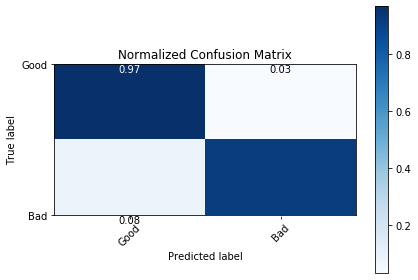

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment='top',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  
    
cm = confusion_matrix(y_test, class_list)
class_names = ['Good', 'Bad']
plot_confusion_matrix(cm, classes=class_names, normalize=True,title='Normalized Confusion Matrix')

1. Load the Data.
2. Initialize the value of K.
3. For predicting the output class for the test data, iterate from 1st data
point to the total number of data points.
 - Calculate distance between test data and each row of training data by the
help of euclidean distance.
 - Sort the calculated distance in ascending order.
 - Get the top K rows from the sorted array.
 - Now find out the most frequent class of the rows.
 - Return the predicted class for the test data.

In [15]:
url = "./haberman.data"

# Assign colum names to the dataset
names = ['patient_age', 'operation_year', 'nb_positive_node', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

# display example data
dataset.head()

,patient_age,operation_year,nb_positive_node,Class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [25]:
# split features and labels
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
stratify=y, test_size=0.2)

print('training data size: ', X_train.shape)
print('test data size: ', X_test.shape)

training data size:  (244, 3)
testt data size:  (62, 3)


In [20]:
def winner_from_dict(pseudo_dict, k):
    """
    returns winner from sorted pseudo-dict, for example:

    winner_from_dict(
    [(4.898979485566356, 1), (5.916079783099616, 1), (6.708203932499369, 1),
    (6.782329983125268, 1), (7.280109889280518, 1), (8.12403840463596, 1),
    (8.12403840463596, 1), (8.602325267042627, 2), (8.94427190999916, 2),
    (9.0, 2), (9.055385138137417, 1), ...] , 8)

    returns 1.

    Args:
        pseudo_dict (list):
        k:
    Returns:
        winner_class (int): class with most occurrence in sorted distance dict
    """
    sorted_tuple_list = Sort(pseudo_dict)  # min to max euclidean distance
    pool = []
    for i in range(k):
        current_couple = sorted_tuple_list[k]
        candidate = current_couple[1]
        pool.append(candidate)
    winner_class = max(set(pool), key=pool.count)

    return winner_class

def Sort(tup):
    return(sorted(tup, key = lambda x: float(x[0])))

Normalized confusion matrix
[[0.7826087 0.2173913]
 [0.4375    0.5625   ]]


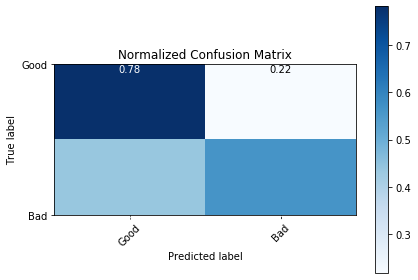

In [23]:
distance_list = []
test_sample_index = 0
# X_test = [X_test[i] for i in range(20)]
class_list = []
k = 100

for test_sample in X_test:
    distance_list.append([])
    for train_data in X_train:
        distance_list[test_sample_index].append(euclidian_distance(test_sample, train_data, 3))
        # print("Distance list", distance_list[test_sample_index])

#     print("y_train_copy is :", y_train)
#     print("distance list before sorting is :", distance_list[test_sample_index])

    pseudo_dict = [(distance_list[test_sample_index][i], y_train[i]) for i
                   in range(len(y_train))]

    res = winner_from_dict(pseudo_dict, k)
    # print("winner is", res)
    # print("for k = ", k)
    class_list.append(res)
    test_sample_index += 1

# print(class_list)
# print(y_test)

C = confusion_matrix(y_test, class_list)
class_names = ['Good', 'Bad']
plot_confusion_matrix(C, classes=class_names, normalize=True,title='Normalized Confusion Matrix')
